In [52]:
import cairo
import matplotlib.pyplot as plt
import numpy as np
import os

from skimage import io
from skimage.util import img_as_ubyte, invert
from skimage.transform import resize
from skimage.exposure import rescale_intensity
from skimage.color import rgb2gray

In [53]:
ASCII_CHARS = list(' .`-_\':,;^=+/"|)\\<>)iv%xclrs{*}I?!][1taeo7zjLunT#JCwfy325Fp6mqSghVd4EgXPGZbYkOA&8U$@KHDBWNMR0Q')[::-1]
print(ASCII_CHARS[:5])

['Q', '0', 'R', 'M', 'N']


In [54]:
def pixel2ascii(pixel_value):
    indx = np.floor((len(ASCII_CHARS) - 1) * pixel_value / 255).astype(int)
    return ASCII_CHARS[indx]

pixel2ascii_vec = np.vectorize(pixel2ascii)


def img2ascii(img, NCOL=120, H2W=1.6, theme="light"):
    assert theme in ("light", "dark"), "Theme argument should light or dark"
    if len(img.shape) > 2:
        img = rgb2gray(img)
    pleft, pright = np.percentile(img, (1, 90))
    img = rescale_intensity(img, in_range=(pleft, pright))
    img = img if theme == "light" else invert(img)

    NROW = round(NCOL * img.shape[0] / img.shape[1] / H2W)

    low_img = img_as_ubyte(resize(img, (NROW, NCOL)))
    ascii_array = pixel2ascii_vec(low_img)
    return ascii_array

In [55]:
def get_line_width(line, context):
    return context.text_extents(line)[4]

def get_char_height(chars, context):
    heights = [context.text_extents(ch)[3] for ch in chars]
    return max(heights)


def cairo_image(out_path, ascii_array, font_size = 20, theme="light"):
    assert theme in ("light", "dark"), "Theme argument should light or dark"
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 100, 100)
    context = cairo.Context(surface)

    context.select_font_face("Courier", cairo.FONT_SLANT_NORMAL, cairo.FONT_WEIGHT_BOLD)
    context.set_font_size(font_size)


    lines = ["".join(l) for l in ascii_array]
    line_width = get_line_width(lines[0], context)
    char_height = get_char_height(ASCII_CHARS, context)

    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, round(line_width), round(char_height) * len(ascii_array))
    context = cairo.Context(surface)

    if theme == "dark":
        context.set_source_rgb(0, 0, 0)
        context.rectangle(0, 0, round(line_width), round(char_height) * len(ascii_array))
        context.fill()



    context.select_font_face("Courier", cairo.FONT_SLANT_NORMAL, cairo.FONT_WEIGHT_BOLD)
    context.set_font_size(font_size)
    if theme == "dark":
        context.set_source_rgb(1, 1, 1)

    for i, l in enumerate(lines):
        context.move_to(0, char_height * i)
        context.show_text(l)
    
    surface.write_to_png(out_path)

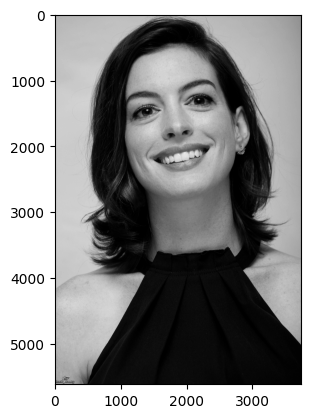

In [56]:
img_path = "./data/anne.jpg"
img = io.imread(img_path, as_gray=True)
plt.imshow(img, cmap="gray")

In [57]:
ascii_array = img2ascii(img, 400, 1.7)
# print(ascii_array[:5, :5])

In [58]:
# print("\n".join(["".join(line) for line in ascii_array]))

In [59]:
path_prefix = os.path.split(os.path.normpath(img_path))[0]
out_path = f"./{path_prefix}/{os.path.splitext(os.path.basename(img_path))[0]}_ascii.png"
cairo_image(out_path, ascii_array, 10)

In [60]:
fls = [f for f in os.listdir('./data') if f.endswith('.jpg')]
for f in fls:
    img = io.imread(f'./data/{f}', as_gray=True)
    ascii_array = img2ascii(img, 600, 1.7)
    path_prefix = os.path.split(os.path.normpath(f))[0]
    out_path = f"./data/{os.path.splitext(os.path.basename(f))[0]}_ascii.png"
    print(out_path)
    cairo_image(out_path, ascii_array, 10)

./data/ana_de_armas_ascii.png
./data/zendaya_ascii.png
./data/emma_ascii.png
./data/anne_ascii.png
./data/spirited_away_ascii.png
./data/anya_ascii.png
